In [1]:
import keras
import tensorflow as tf
print("Keras Current Version:", keras.__version__, "Tensorflow Current Version:", tf.__version__)

Keras Current Version: 3.8.0 Tensorflow Current Version: 2.18.0


In [2]:
!pip uninstall tf-keras
!pip install tensorflow==2.16.1

Found existing installation: tf_keras 2.18.0
Uninstalling tf_keras-2.18.0:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/tf_keras-2.18.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/tf_keras/*
Proceed (Y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/uninstall.py", line 106, in run
    uninstall_pathset = req.uninstall(
                        ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/req/req_install.py", line 722, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/req/req_uninstall.py", line 364, in remove
    if auto_confirm or self._allowed_to_proceed(verbose):
                  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import layers, datasets, metrics

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization, Input


random.seed(32)
np.random.seed(32)
tf.random.set_seed(32)


In [4]:
(X_train, y_train), (X_val, y_val) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [6]:
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 1)


In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
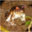

In [8]:
X_train[0]

In [9]:
def show_random_examples(images, labels, num_examples=25, figsize=(10, 10)):
    indices = np.random.choice(len(images), num_examples, replace=False)
    plt.figure(figsize=figsize)
    for i, idx in enumerate(indices):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[idx], cmap='gray')
        plt.xlabel(labels[idx])
    plt.show()

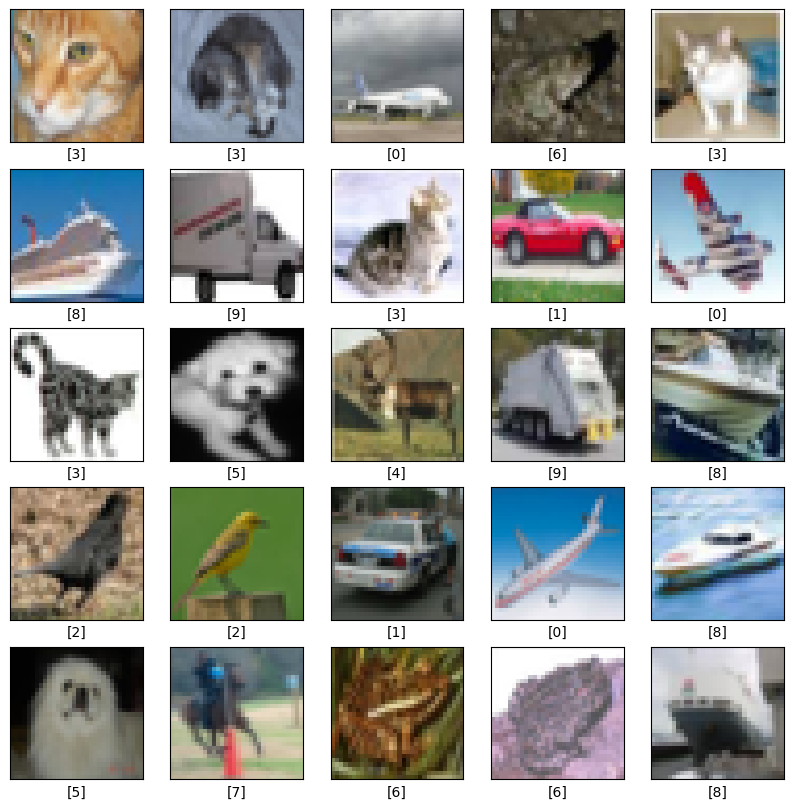

In [10]:
show_random_examples(X_train, y_train)

In [11]:
def prepare_datasets(X_train, X_val, y_train, y_val, batch_size=None):
    if batch_size is None:
        batch_size = len(X_train)
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
    val_dataset = val_dataset.batch(batch_size)
    return train_dataset, val_dataset

In [12]:
X_train, X_val = X_train / 255.0, X_val / 255.0

In [13]:
train_ds, val_ds = prepare_datasets(X_train, X_val, y_train, y_val, batch_size=32)

In [14]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
metrics = [
    metrics.SparseCategoricalAccuracy(name="sparse_categorical_accuracy"),

    metrics.AUC(name='auc', multi_label=True)]

In [16]:
model.compile(optimizer='adam',

              loss="sparse_categorical_crossentropy",

              metrics=metrics)

In [17]:
early_stopping = EarlyStopping(monitor='val_loss',
                           patience=20,
                           verbose=1)

model_checkpoint = ModelCheckpoint(filepath='cifar10_model.keras',
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,
                             verbose=1)

In [18]:
history = model.fit(train_ds,
                    epochs=10,
                    validation_data=val_ds,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - auc: 0.5385 - loss: 1.7323 - sparse_categorical_accuracy: 0.3544
Epoch 1: val_loss improved from inf to 1.26250, saving model to cifar10_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - auc: 0.5385 - loss: 1.7321 - sparse_categorical_accuracy: 0.3545 - val_auc: 0.5306 - val_loss: 1.2625 - val_sparse_categorical_accuracy: 0.5494
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - auc: 0.5267 - loss: 1.1465 - sparse_categorical_accuracy: 0.5928
Epoch 2: val_loss improved from 1.26250 to 1.01279, saving model to cifar10_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - auc: 0.5267 - loss: 1.1465 - sparse_categorical_accuracy: 0.5928 - val_auc: 0.5374 - val_loss: 1.0128 - val_sparse_categorical_accuracy: 0.6402
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - auc: 0.5262 - loss: 0.9626 - sparse_categorical_accuracy: 0.6618
Epoch 3: val_loss improved from 1.01279 to 0.94065, saving model to cifar10_mode

In [19]:
def plot_training_history(history, train_loss='loss', train_metric='accuracy', val_loss='val_loss', val_metric='val_accuracy'):

    #Loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_loss], label='Training Loss')
    plt.plot(history.history[val_loss], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Metrics
    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_metric], label=f"Training: {train_metric}")
    plt.plot(history.history[val_metric], label=f"Validation: {val_metric}")
    plt.title(f'Training and Validation {train_metric} Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(f'train_metric')
    plt.legend()
    plt.show()

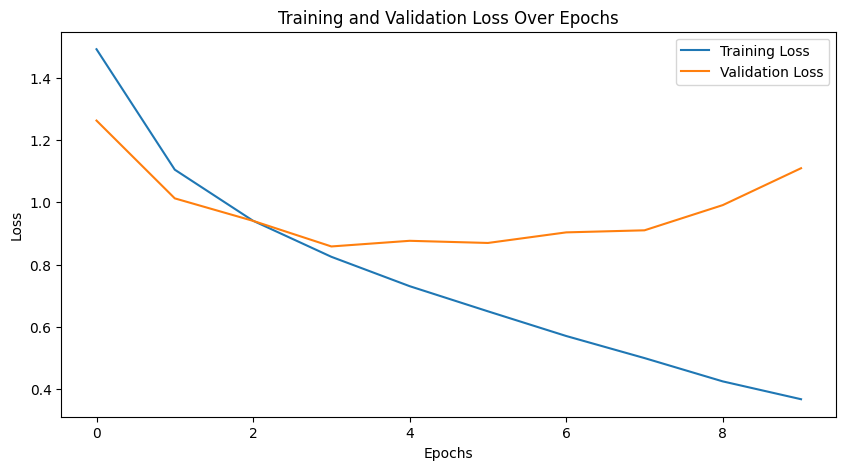

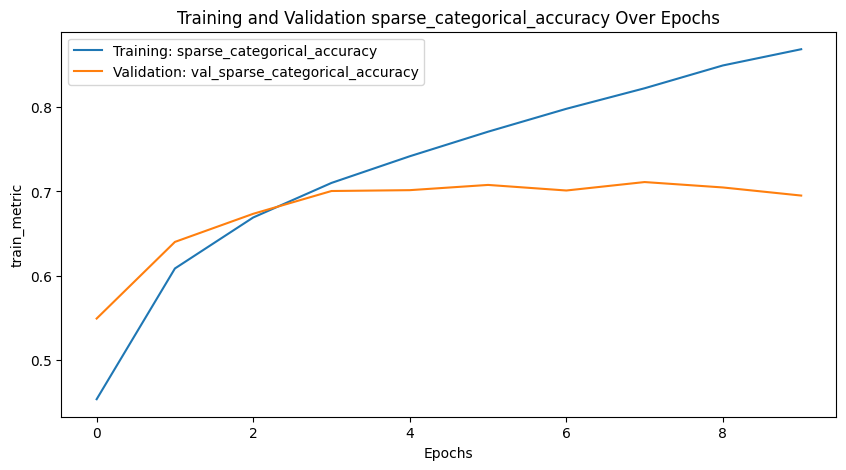

In [20]:
plot_training_history(history, train_loss='loss', train_metric='sparse_categorical_accuracy', val_loss='val_loss', val_metric='val_sparse_categorical_accuracy')

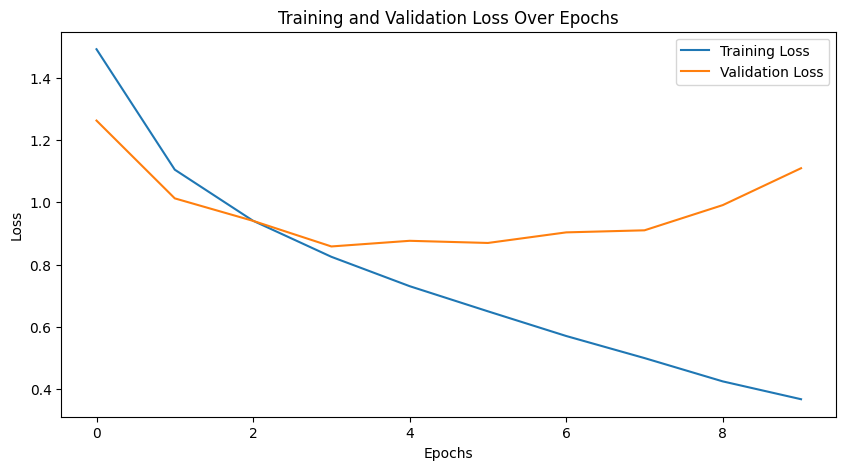

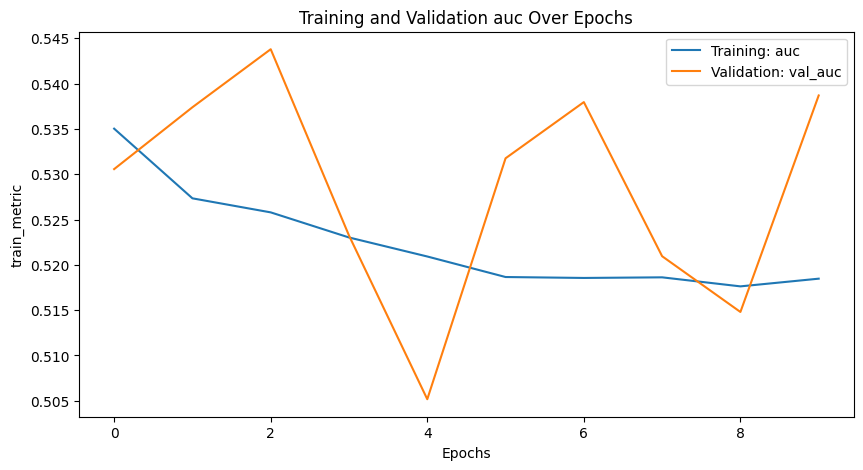

In [21]:
plot_training_history(history, train_loss='loss', train_metric='auc', val_loss='val_loss', val_metric='val_auc')

In [22]:
val_loss, sparse_categorical_accuracy, auc = model.evaluate(val_ds, verbose=0)
print(f"Loss: {val_loss}")
print(f"Accuracy: {sparse_categorical_accuracy}")
print(f"AUC: {auc}")

Loss: 1.1095629930496216
Accuracy: 0.6951000094413757
AUC: 0.5386931300163269
